## Problem
 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set

Import all necessary packages

In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [101]:
#Load Data and analyze
train=pd.read_csv("/home/pushpendra/Documents/career/ML/Dataset/loan_train.csv")
test=pd.read_csv("/home/pushpendra/Documents/career/ML/Dataset/loan_test.csv")
loan_id=list()
loan_id=test["Loan_ID"]
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
#Lets look at the type of data
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [103]:
train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate Analysis


In [104]:
#Drop loan id as it will have  no effect on prediction
train.drop(["Loan_ID"],axis=1,inplace=True)
test.drop(["Loan_ID"],axis=1,inplace=True)

In [105]:
# Get a list of categorical variable 
categorical_variable=train.dtypes.loc[train.dtypes=="object"].index
print(categorical_variable)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [106]:
# NOw use apply function to determine no. of unique values in each column.
train[categorical_variable].apply(lambda x:len(x.unique()))

Gender           3
Married          2
Dependents       5
Education        2
Self_Employed    3
Property_Area    3
Loan_Status      2
dtype: int64

## Mutlivariate Analysis 

In [107]:
#Cross tabulation
ct=pd.crosstab(train["Education"],train["Loan_Status"],margins=True)
ct

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


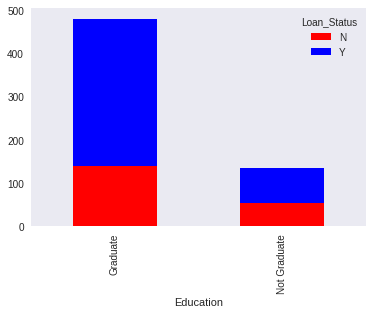

In [108]:
#bar plot 
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind="bar",stacked=True,color=['red','blue'],grid=False)

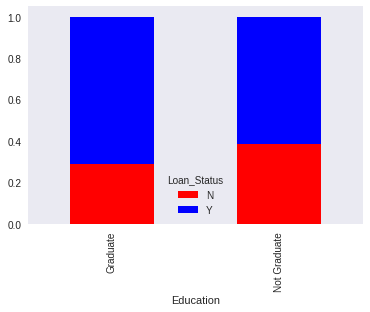

In [109]:
def perconverter(ser):
    return ser/float(ser[-1])
ct2=ct.apply(perconverter,axis=1)
ct2.iloc[:-1,:-1].plot(kind="bar",stacked=True,color=['red','blue'],grid=False)

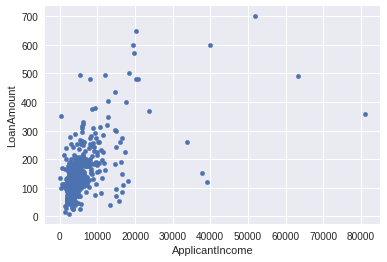

In [110]:
train.plot("ApplicantIncome","LoanAmount",kind="scatter")

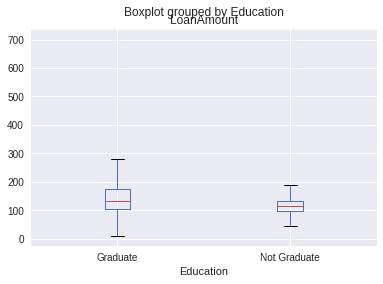

In [111]:
train.boxplot(column="LoanAmount",by="Education")

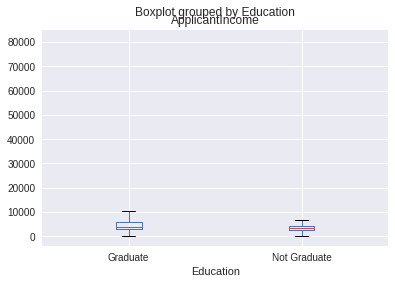

In [112]:
train.boxplot(column="ApplicantIncome",by="Education")

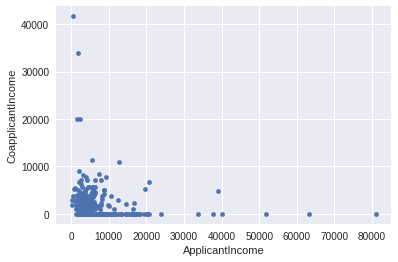

In [113]:
train.plot("ApplicantIncome","CoapplicantIncome",kind="scatter")

## Missing Value Treatment

In [114]:
#Checking missing values in train data
train.apply(lambda x:sum(x.isnull()))

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
#Checking missing values in test data
test.apply(lambda x:sum(x.isnull()))


Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [116]:
#Filling the missing data
train['Gender'].fillna(train.Gender.dropna().max(),inplace=True)
train['Dependents'].fillna(train.Dependents.dropna().max(),inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].dropna().max(),inplace=True)
train['LoanAmount'].fillna(train.LoanAmount.dropna().mean(),inplace=True)
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mean(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].dropna().mean(),inplace=True)
train.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [117]:
#Checking missing values in train data
train.apply(lambda x:sum(x.isnull()))


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [118]:
#Filling the missing data in test data
test['Gender'].fillna(test.Gender.dropna().max(),inplace=True)
test['Dependents'].fillna(test.Dependents.dropna().max(),inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].dropna().max(),inplace=True)
test['LoanAmount'].fillna(test.LoanAmount.dropna().mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].dropna().mean(),inplace=True)

In [119]:
#Checking missing values in test data
test.apply(lambda x:sum(x.isnull()))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Variable Transformation

In [120]:
#Determine the % of observation in Work Class
train['Dependents'].value_counts()/train.shape[0]

0     0.561889
1     0.166124
2     0.164495
3+    0.107492
Name: Dependents, dtype: float64

Since there are not so many categories in categorical data there is no nedd of any varible transformation

## Predictive Modelling
### Data Preprocessing

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
categories_variables=train.dtypes.loc[train.dtypes=="object" ].index
categories_variables_test=test.dtypes.loc[test.dtypes=="object"].index
categories_variables

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [123]:
# Now we convert object type to  numerical

le=LabelEncoder()
for var in categories_variables:

    le.fit(train[var])
    train[var]=le.transform(train[var])
 
for var in categories_variables_test:
    le.fit(test[var])
    test[var]=le.transform(test[var])


In [124]:
#check now datatypes
train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [125]:
#Fit the model
from sklearn.tree import DecisionTreeClassifier
dependent_variable='Loan_Status'
independent_variable=[x for x in train.columns if x  not in [dependent_variable]]
print(independent_variable)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [126]:
#Initialize the algorithm
model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')
model.fit(train[independent_variable],train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [127]:
#Gaussian Naive Bayes
model=GaussianNB()

model.fit(train[independent_variable],train[dependent_variable])

GaussianNB(priors=None)

In [128]:
#Kneighborclassifier

model=KNeighborsClassifier(n_neighbors=2)
model.fit(train[independent_variable],train[dependent_variable])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [129]:
#Logistic
model=LogisticRegression(penalty="l1", C=0.1)
model.fit(train[independent_variable],train[dependent_variable])

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
predict_train=model.predict(train[independent_variable])
predict_test=model.predict(test[independent_variable])

In [131]:
from sklearn.metrics import accuracy_score

acc_train=accuracy_score(train[dependent_variable],predict_train)
print("Train accuracy %f "%acc_train)


Train accuracy 0.811075 


In [132]:
prediction=list()
for i in range(len(predict_test)):
    if predict_test[i] ==0:
        prediction.append("N")
    else:
        prediction.append("Y")
submission=pd.DataFrame({"Loan_ID":loan_id,
                        "Loan_Status":prediction})
submission.to_csv(r'/home/pushpendra/Documents/career/Loan_prediction.csv',index=False)